In [1]:
# Create your first MLP in Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
import os
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
np.random.seed(1)

In [3]:

dataset = np.loadtxt("train_vn.txt")
# split into input (X) and output (Y) variables
X = dataset[:,0:300]
Y = dataset[:,300]
Y = keras.utils.to_categorical(Y, num_classes=2)

test_data = np.loadtxt("test_vn.txt")
# split into input (X) and output (Y) variables
X_test = dataset[:,0:300]
Y_test = dataset[:,300]
Y_test = keras.utils.to_categorical(Y_test, num_classes=2)



In [8]:
# create model
model = Sequential()
model.add(Dense(100, input_dim=300, activation='softmax'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
# Compile model
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 202       
Total params: 30,302
Trainable params: 30,302
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Fit the model 1
history = model.fit(X, Y, epochs=50, batch_size=10,
          validation_data=(X_test, Y_test))
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Train on 1459 samples, validate on 1459 samples
Epoch 1/50
1459/1459 [==============================] - 0s - loss: 0.6171 - acc: 0.6477 - val_loss: 0.5410 - val_acc: 0.7656
Epoch 2/50
1459/1459 [==============================] - 0s - loss: 0.5225 - acc: 0.7478 - val_loss: 0.4769 - val_acc: 0.8259
Epoch 3/50
1459/1459 [==============================] - 0s - loss: 0.4720 - acc: 0.8005 - val_loss: 0.4366 - val_acc: 0.8321
Epoch 4/50
1459/1459 [==============================] - 0s - loss: 0.4454 - acc: 0.8239 - val_loss: 0.4067 - val_acc: 0.8595
Epoch 5/50
1459/1459 [==============================] - 0s - loss: 0.4218 - acc: 0.8396 - val_loss: 0.3970 - val_acc: 0.8588
Epoch 6/50
1459/1459 [==============================] - 0s - loss: 0.4044 - acc: 0.8430 - val_loss: 0.3693 - val_acc: 0.8705
Epoch 7/50
1459/1459 [==============================] - 0s - loss: 0.3781 - acc: 0.8588 - val_loss: 0.3558 - val_acc: 0.8732
Epoch 8/50
1459/1459 [==============================] - 0s - loss: 0.3696 - a

dict_keys(['val_acc', 'loss', 'val_loss', 'acc'])


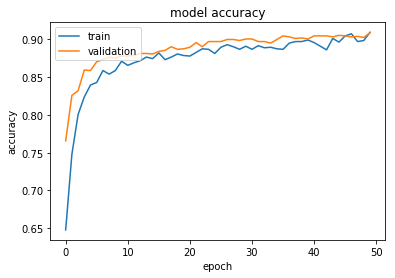

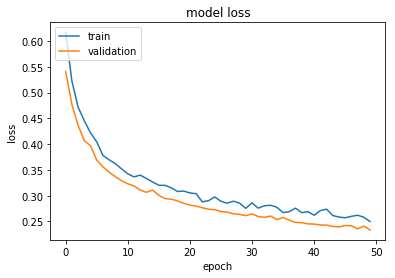

In [11]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()